In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Drumsticks - BatData.csv")

In [ ]:
df

,ID,GameFormat,SR,BattingInnings,IsOut,Opposition,Ground,TossResult,MatchTime,isTossWon,...,Opps,MaxTemp,MinTemp,MaxWind,Tournament,BattingOrder,Role,Country,Batting Hand,Age
0,28081,6,0.000000,2,1,South Africa,Johannesburg,bat,night,0,...,1.0927,25.3,13.6,15.9,Bilateral,2,WK,India,RHB,25
1,28081,3,0.000000,2,1,South Africa,Johannesburg,bat,night,0,...,1.0927,25.3,13.6,15.9,Bilateral,2,WK,India,RHB,25
2,44828,6,0.000000,2,1,Eagles,Centurion,bat,day,0,...,1.0927,32.6,16.5,24.5,Other,1,BAT,South Africa,RHB,23
3,44828,6,173.684211,1,1,Warriors,Gqeberha,bat,night,1,...,1.0927,25.5,20.3,28.6,Other,1,BAT,South Africa,RHB,23
4,44828,6,150.000000,2,1,Cape Cobras,Cape Town,bat,night,0,...,1.0927,27.9,17.3,26.7,Other,1,BAT,South Africa,RHB,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24273,600498,6,134.407849,2,1,MI Cape Town,Johannesburg,bat,daynight,0,...,3.0623,26.5,14.4,10.4,SA20,2,BAT,South African,RHB,31
24274,696401,6,142.971888,2,1,MI Cape Town,Johannesburg,bat,daynight,0,...,3.0623,26.5,14.4,10.4,SA20,3,ALL,South Africa,RHB,25
24275,662973,6,133.974558,1,0,DC,Dubai (DICS),field,night,0,...,3.5755,22.9,19.1,18.6,T20 Tournament,2,ALL,England,LHB,27
24276,820351,6,138.502446,2,1,Vipers,Dubai (DICS),field,night,1,...,3.4015,22.9,19.1,18.6,T20 Tournament,2,BAT,West Indies,RHB,32


In [ ]:
df.columns

Index(['ID', 'GameFormat', 'SR', 'BattingInnings', 'IsOut', 'Opposition',
       'Ground', 'TossResult', 'MatchTime', 'isTossWon', 'Fantasy',
       'isHomeGround', 'GroundWL', 'GroundRPO', 'GroundAvg', 'TossWL',
       'TossRPO', 'TossAvg', 'inningsWL', 'inningsRPO', 'inningsAverage',
       'Average', 'Innings', 'Centuries', 'Fifties', 'Zeros', 'Consistency',
       'Form', 'Venue', 'Opps', 'MaxTemp', 'MinTemp', 'MaxWind', 'Tournament',
       'BattingOrder', 'Role', 'Country', 'Batting Hand', 'Age'],
      dtype='object')

In [ ]:
categorical_columns = ["ID", 'Opposition', 'Ground', 'TossResult', 'Tournament', 'MatchTime', "Role", "Country", "Batting Hand"]
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [ ]:
y = df["Fantasy"]
df.drop("Fantasy", axis = 1, inplace = True)

In [ ]:
df.dtypes

,0
ID,category
GameFormat,int64
SR,float64
BattingInnings,int64
IsOut,int64
Opposition,category
Ground,category
TossResult,category
MatchTime,category
isTossWon,int64


In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
import joblib
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)

In [ ]:
df.columns

Index(['ID', 'GameFormat', 'SR', 'BattingInnings', 'IsOut', 'Opposition',
       'Ground', 'TossResult', 'MatchTime', 'isTossWon', 'isHomeGround',
       'GroundWL', 'GroundRPO', 'GroundAvg', 'TossWL', 'TossRPO', 'TossAvg',
       'inningsWL', 'inningsRPO', 'inningsAverage', 'Average', 'Innings',
       'Centuries', 'Fifties', 'Zeros', 'Consistency', 'Form', 'Venue', 'Opps',
       'MaxTemp', 'MinTemp', 'MaxWind', 'Tournament', 'BattingOrder', 'Role',
       'Country', 'Batting Hand', 'Age'],
      dtype='object')

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

xgb = XGBRegressor(
    objective="reg:squarederror",  # Correct objective for Huber loss
    eval_metric="mae",                # Mean Absolute Error for evaluation
    learning_rate=0.1,               # Reduce learning rate for stability
    max_depth=22,                      # Allow deeper trees for complex patterns
    min_child_weight=10,               # Prevent small noisy splits
    gamma=10,                          # Require significant gain to split
    reg_alpha=0.1,                    # L1 regularization (sparse solutions)
    reg_lambda=1,                   # L2 regularization (improves stability)
    subsample=1,                    # Use 80% of data for each tree
    colsample_bytree=1,             # Use 80% of features per tree
    n_estimators=500,                 # Number of boosting rounds
    random_state=42,                   # For reproducibility
    enable_categorical=True,
)

# Train the model
xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)])

# Make predictions
y_pred = xgb.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

[0]	validation_0-mae:33.19850
[1]	validation_0-mae:32.28622
[2]	validation_0-mae:31.41086
[3]	validation_0-mae:30.68712
[4]	validation_0-mae:29.99744
[5]	validation_0-mae:29.41281
[6]	validation_0-mae:28.90971
[7]	validation_0-mae:28.46059
[8]	validation_0-mae:28.02968
[9]	validation_0-mae:27.67161
[10]	validation_0-mae:27.32565
[11]	validation_0-mae:27.04746
[12]	validation_0-mae:26.81060
[13]	validation_0-mae:26.56246
[14]	validation_0-mae:26.34164
[15]	validation_0-mae:26.16604
[16]	validation_0-mae:25.98506
[17]	validation_0-mae:25.82178
[18]	validation_0-mae:25.65915
[19]	validation_0-mae:25.50532
[20]	validation_0-mae:25.36340
[21]	validation_0-mae:25.23460
[22]	validation_0-mae:25.09461
[23]	validation_0-mae:25.02471
[24]	validation_0-mae:24.89777
[25]	validation_0-mae:24.79049
[26]	validation_0-mae:24.69273
[27]	validation_0-mae:24.61341
[28]	validation_0-mae:24.51735
[29]	validation_0-mae:24.45918
[30]	validation_0-mae:24.37965
[31]	validation_0-mae:24.29707
[32]	validation_0-

In [ ]:
for i in range(len(y_test)):
  print(y_test.iloc[i], y_pred[i])

27 34.665737
1 40.137493
19 14.553263
74 41.501873
-4 12.313441
3 7.1742206
14 2.3304148
75 85.55185
102 63.62403
0 47.458355
22 31.530426
49 36.2752
23 60.965862
160 62.893524
62 20.936596
-2 50.19402
27 28.410791
17 5.5202465
2 38.008373
32 39.278255
16 37.352417
19 14.097464
83 60.072887
118 28.928558
30 33.654026
-2 0.25495675
25 9.092366
20 16.55693
-2 76.018394
-4 -0.32545257
90 86.27745
26 24.09207
33 75.16578
22 57.686844
37 38.455967
60 72.17531
130 37.964798
5 16.43609
122 201.87544
16 18.466402
32 33.259552
12 13.242432
0 2.959723
-1 3.3678463
6 31.294788
4 39.468002
1 3.393095
13 39.490364
9 49.1006
17 23.770826
26 66.22977
43 17.96448
22 20.815516
132 119.19183
193 89.61179
16 15.395806
51 55.706978
12 41.136658
42 23.675968
116 86.89345
3 17.333029
57 51.3342
114 44.51061
5 27.466927
-4 5.201036
177 83.49258
39 32.99271
29 9.061533
106 35.036407
54 61.060085
83 86.34433
124 111.81345
-4 0.051348
76 69.00753
9 4.896627
159 168.40286
42 51.733692
99 97.35498
25 26.83521
140

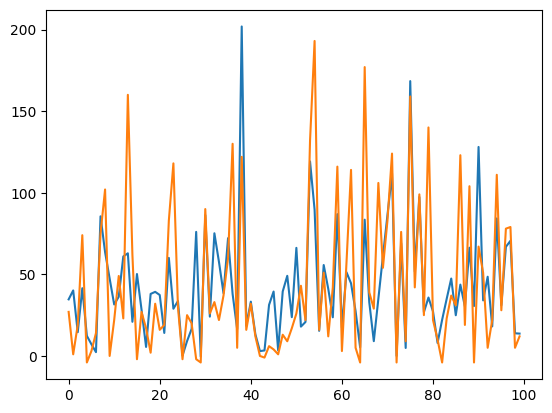

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred[:100])
plt.plot(np.array(y_test)[:100])

In [ ]:
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
import itertools
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Define the regressor
reg = xgb.XGBRegressor(
    learning_rate=0.1,
    eval_metric="mae",  # RMSE is a common metric for regression
    tree_method='hist',
    device='cuda',
    objective='reg:squarederror',  # Suitable objective for regression
    enable_categorical=True
)

# Define the parameter grid
param_grid = {
    'max_depth': [6, 10, 14, 18, 22, 26],
    'n_estimators': [100, 300],
    'colsample_bytree': [0.5, 0.8],
    'subsample': [0.5, 0.8]
}

def manual_grid_search_with_print(estimator, param_grid, X, y, cv=3, scoring='r2'):
    # Generate all parameter combinations
    keys, values = zip(*param_grid.items())
    all_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    results = []
    for params in all_combinations:
        estimator.set_params(**params)
        # Evaluate the candidate using cross-validation
        scores = cross_val_score(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
        mean_score = scores.mean()
        print(f"R^2 Score: {mean_score:.4f} | Params: {params}")
        results.append({'params': params, 'mean_test_score': mean_score})
    return results

# Example usage:
results = manual_grid_search_with_print(reg, param_grid, x_train, y_train)

R^2 Score: 0.2437 | Params: {'max_depth': 6, 'n_estimators': 100, 'colsample_bytree': 0.5, 'subsample': 0.5}
R^2 Score: 0.2672 | Params: {'max_depth': 6, 'n_estimators': 100, 'colsample_bytree': 0.5, 'subsample': 0.8}
R^2 Score: 0.2335 | Params: {'max_depth': 6, 'n_estimators': 100, 'colsample_bytree': 0.8, 'subsample': 0.5}
R^2 Score: 0.2533 | Params: {'max_depth': 6, 'n_estimators': 100, 'colsample_bytree': 0.8, 'subsample': 0.8}
R^2 Score: 0.2300 | Params: {'max_depth': 6, 'n_estimators': 300, 'colsample_bytree': 0.5, 'subsample': 0.5}
R^2 Score: 0.2636 | Params: {'max_depth': 6, 'n_estimators': 300, 'colsample_bytree': 0.5, 'subsample': 0.8}
R^2 Score: 0.2186 | Params: {'max_depth': 6, 'n_estimators': 300, 'colsample_bytree': 0.8, 'subsample': 0.5}
R^2 Score: 0.2446 | Params: {'max_depth': 6, 'n_estimators': 300, 'colsample_bytree': 0.8, 'subsample': 0.8}
R^2 Score: 0.2859 | Params: {'max_depth': 10, 'n_estimators': 100, 'colsample_bytree': 0.5, 'subsample': 0.5}
R^2 Score: 0.3022 

KeyboardInterrupt: 

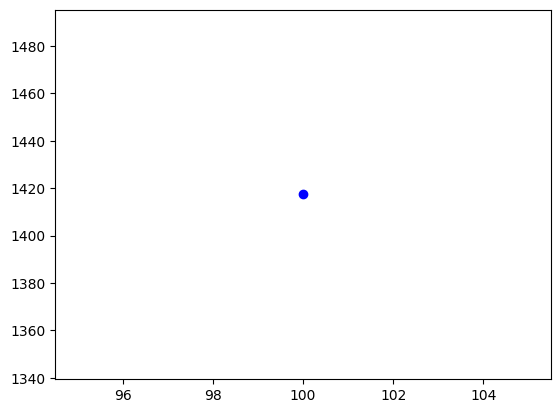

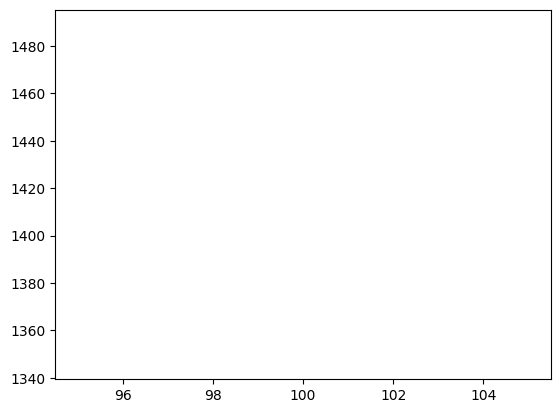

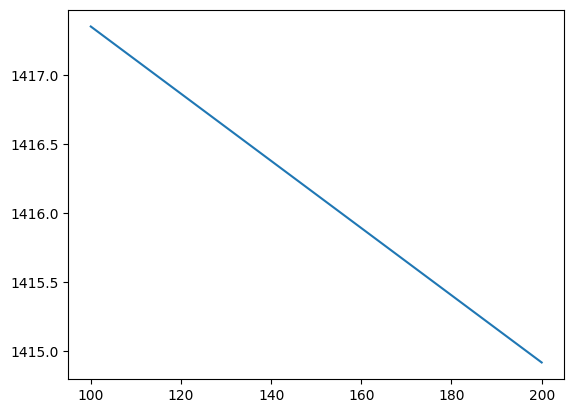

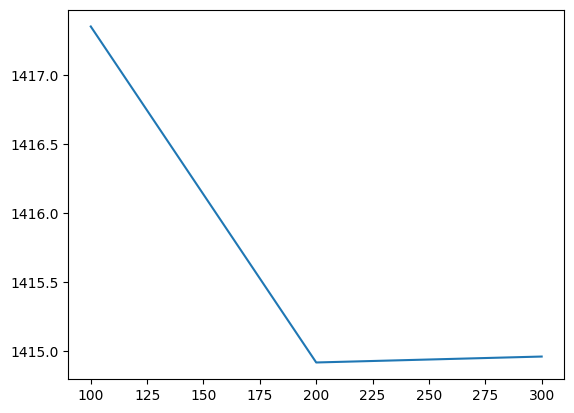

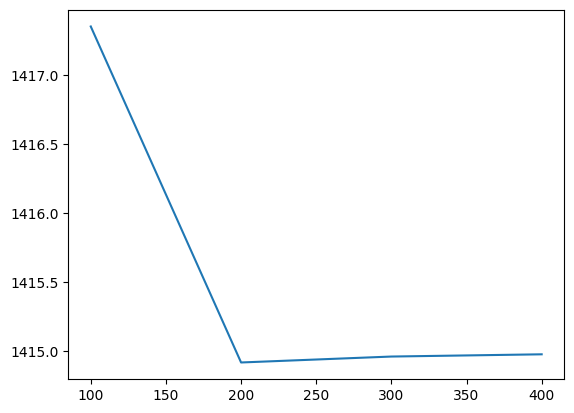

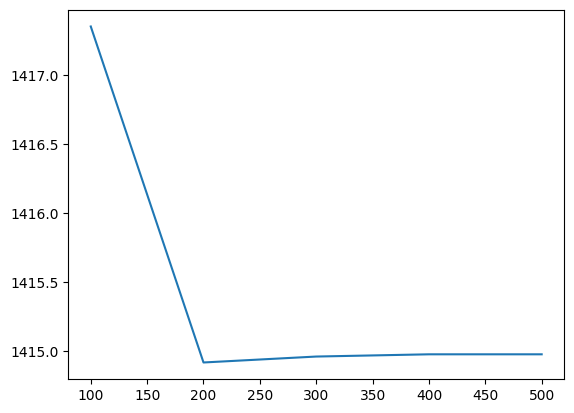

KeyboardInterrupt: 

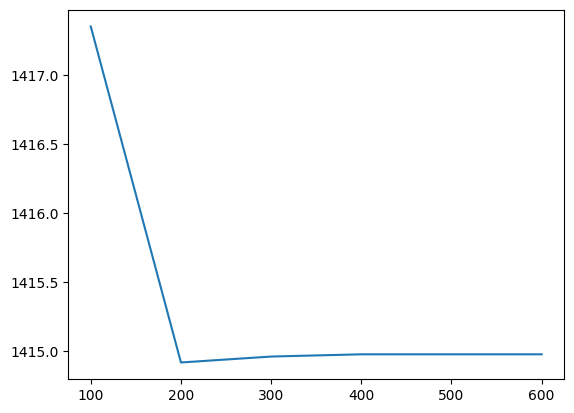

In [ ]:
accuracyEta = []
Eta = []
plt.ion()
fig, ax = plt.subplots()
line, = ax.plot([], [], 'bo-')
colsample_bytree= [0.5, 0.8],
subsample= [0.5, 0.8]
for eta in range(100, 1000, 100):
      xgb = XGBRegressor(
        objective='reg:huber',  # Suitable for regression
        n_estimators=eta,              # Number of boosting rounds
        learning_rate=0.1,             # Step size shrinkage
        max_depth=15,                   # Maximum tree depth
        random_state=42,                # For reproducibility
        enable_categorical=True,
        device="cuda",
        min_child_weight= 5,
        gamma= 2,
        subsample= 0.8,
        colsample_bytree= 0.8
      )
      xgb.fit(x_train, y_train)
      y_pred = xgb.predict(x_validation)
      mean_squared_error(y_validation, y_pred)
      Eta.append(eta)
      line.set_xdata(Eta)
      line.set_ydata(accuracyEta)

      ax.relim()  # Recalculate limits
      ax.autoscale_view()  # Rescale the view

      plt.draw()
      plt.pause(0.1)  # Pause to update the figure
      time.sleep(0.1)
      plt.plot(Eta, accuracyEta)

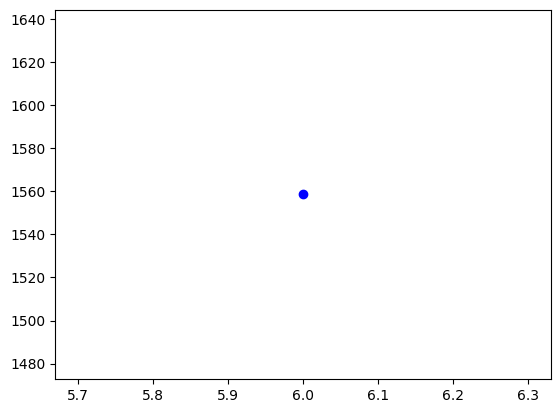

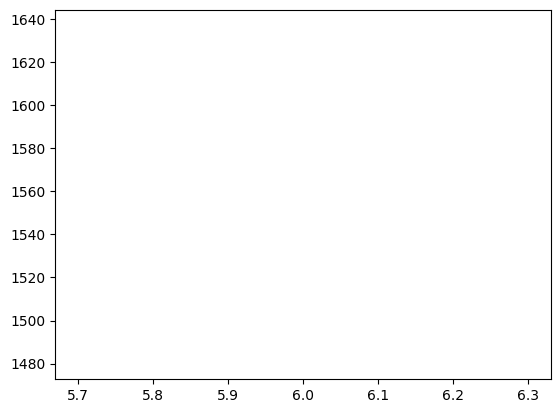

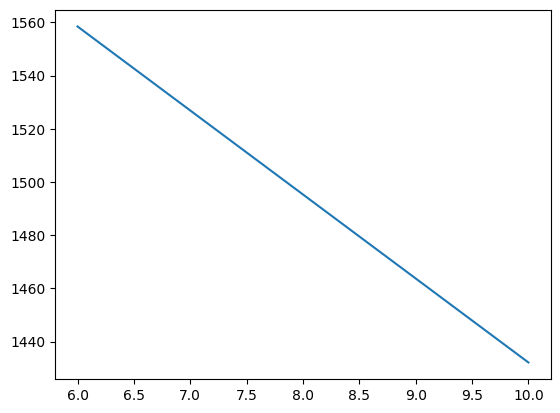

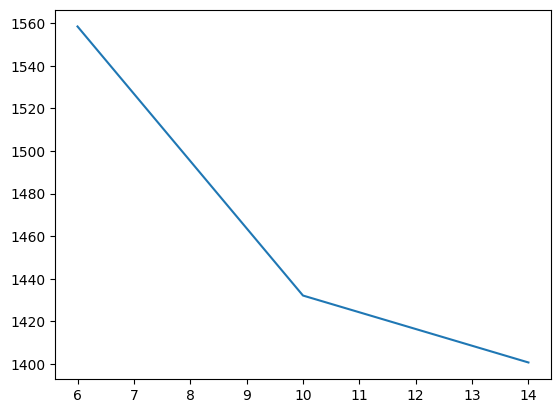

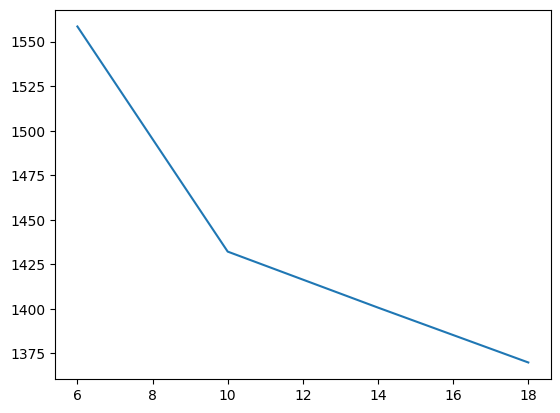

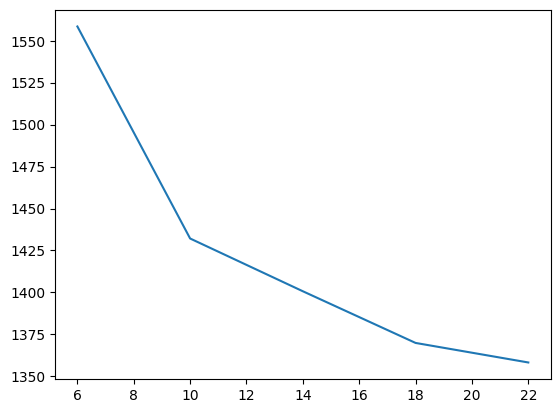

In [ ]:
accuracyDepth = []
Depth = []
plt.ion()
fig, ax = plt.subplots()
line, = ax.plot([], [], 'bo-')
for depth in range(6, 25, 4):
  xgb = XGBRegressor(
    objective='reg:squarederror',  # Suitable for regression
    n_estimators=200,              # Number of boosting rounds
    learning_rate=0.1,             # Step size shrinkage
    max_depth=depth,                   # Maximum tree depth
    random_state=42,                # For reproducibility
    enable_categorical=True,
    device="cuda"
  )
  xgb.fit(x_train, y_train)
  y_pred = xgb.predict(x_validation)
  accuracyDepth.append(mean_squared_error(y_validation, y_pred))
  Depth.append(depth)
  line.set_xdata(Depth)
  line.set_ydata(accuracyDepth)

  ax.relim()  # Recalculate limits
  ax.autoscale_view()  # Rescale the view

  plt.draw()
  plt.pause(0.1)  # Pause to update the figure
  time.sleep(0.1)
  plt.plot(Depth, accuracyDepth)